In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
from scipy.cluster.hierarchy import linkage,dendrogram,cophenet
from sklearn.metrics.pairwise import euclidean_distances

In [2]:
df=pd.read_csv('marketing_campaign.csv.xls',sep='\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
#From the above output, we can conclude and note that:

#There are missing values in income
#Dt_Customer that indicates the date a customer joined the database is not in DateTime format.
#There are some categorical features in our data frame; as there are some features in dtype: object).


In [5]:
df.fillna(value=df.Income.mean(),inplace=True)

In [6]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [7]:
# filled the Income with mean of Income

In [8]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"],format= 'mixed')
dates = []
for i in df["Dt_Customer"]:
    i = i.date()
    dates.append(i)  
df["Dt_Customer"]

0      2012-04-09
1      2014-08-03
2      2013-08-21
3      2014-10-02
4      2014-01-19
          ...    
2235   2013-06-13
2236   2014-10-06
2237   2014-01-25
2238   2014-01-24
2239   2012-10-15
Name: Dt_Customer, Length: 2240, dtype: datetime64[ns]

In [9]:
df.head(2)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,5,0,0,0,0,0,0,3,11,0


In [10]:
df.Education.unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [11]:
df.Marital_Status.unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [12]:
df['Age']=2023-df['Year_Birth']

In [13]:
#adding up money spent to fom expenses

df['expenses']= df["MntWines"]+ \
                df["MntFruits"]+ df["MntMeatProducts"]+ \
                df["MntFishProducts"]+ df["MntSweetProducts"]+ \
                df["MntGoldProds"]




In [14]:
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [15]:
df['Marital_Status']=df['Marital_Status'].replace({'Married':'couple',
                                                 'Together':'couple',
                                                 'Divorced':'Single',
                                                 'Widow':'Single',
                                                 'Alone':'Single',
                                                 'Absurd':'Single',
                                                 'YOLO':'Single'})

In [16]:
df['children']=df['Kidhome']+df['Teenhome']

In [17]:
df['family_count']=df['Marital_Status'].replace({'couple':2,'Single':1})\
                   +df['children']



In [18]:
df.drop(["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"],axis=1,inplace=True)

In [19]:
df

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,expenses,children,family_count
0,Graduation,58138.0,0,0,58,635,88,546,172,88,...,0,0,0,0,0,1,66,1617,0,1
1,Graduation,46344.0,1,1,38,11,1,6,2,1,...,0,0,0,0,0,0,69,27,2,3
2,Graduation,71613.0,0,0,26,426,49,127,111,21,...,0,0,0,0,0,0,58,776,0,2
3,Graduation,26646.0,1,0,26,11,4,20,10,3,...,0,0,0,0,0,0,39,53,1,3
4,PhD,58293.0,1,0,94,173,43,118,46,27,...,0,0,0,0,0,0,42,422,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduation,61223.0,0,1,46,709,43,182,42,118,...,0,0,0,0,0,0,56,1341,1,3
2236,PhD,64014.0,2,1,56,406,0,30,0,0,...,0,0,1,0,0,0,77,444,3,5
2237,Graduation,56981.0,0,0,91,908,48,217,32,12,...,1,0,0,0,0,0,42,1241,0,1
2238,Master,69245.0,0,1,8,428,30,214,80,30,...,0,0,0,0,0,0,67,843,1,3


In [20]:
df.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,expenses,children,family_count
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,...,0.074554,0.072768,0.064286,0.013393,0.009375,0.149107,54.194196,605.798214,0.950446,2.595089
std,25037.797168,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,...,0.262728,0.259813,0.245316,0.114976,0.096391,0.356274,11.984069,602.249288,0.751803,0.906959
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.000000,5.000000,0.000000,1.000000
25%,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,46.000000,68.750000,0.000000,2.000000
50%,51741.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,53.000000,396.000000,1.000000,3.000000
75%,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,64.000000,1045.500000,1.000000,3.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,130.000000,2525.000000,3.000000,5.000000


In [21]:
# The max age shows 130 which is rare, The data is old so that could be a reason


In [22]:
df.Education.unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [23]:
df.Education.replace({'Basic':'UG','2n Cycle':'UG'},inplace=True)

In [24]:
df.Education.replace({'UG':0,'Graduation':1,'Master':2,'PhD':3},inplace=True)

In [25]:
df.Education.unique()

array([1, 3, 2, 0])

In [26]:

df.drop(['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response'],axis=1,inplace=True)

<Axes: >

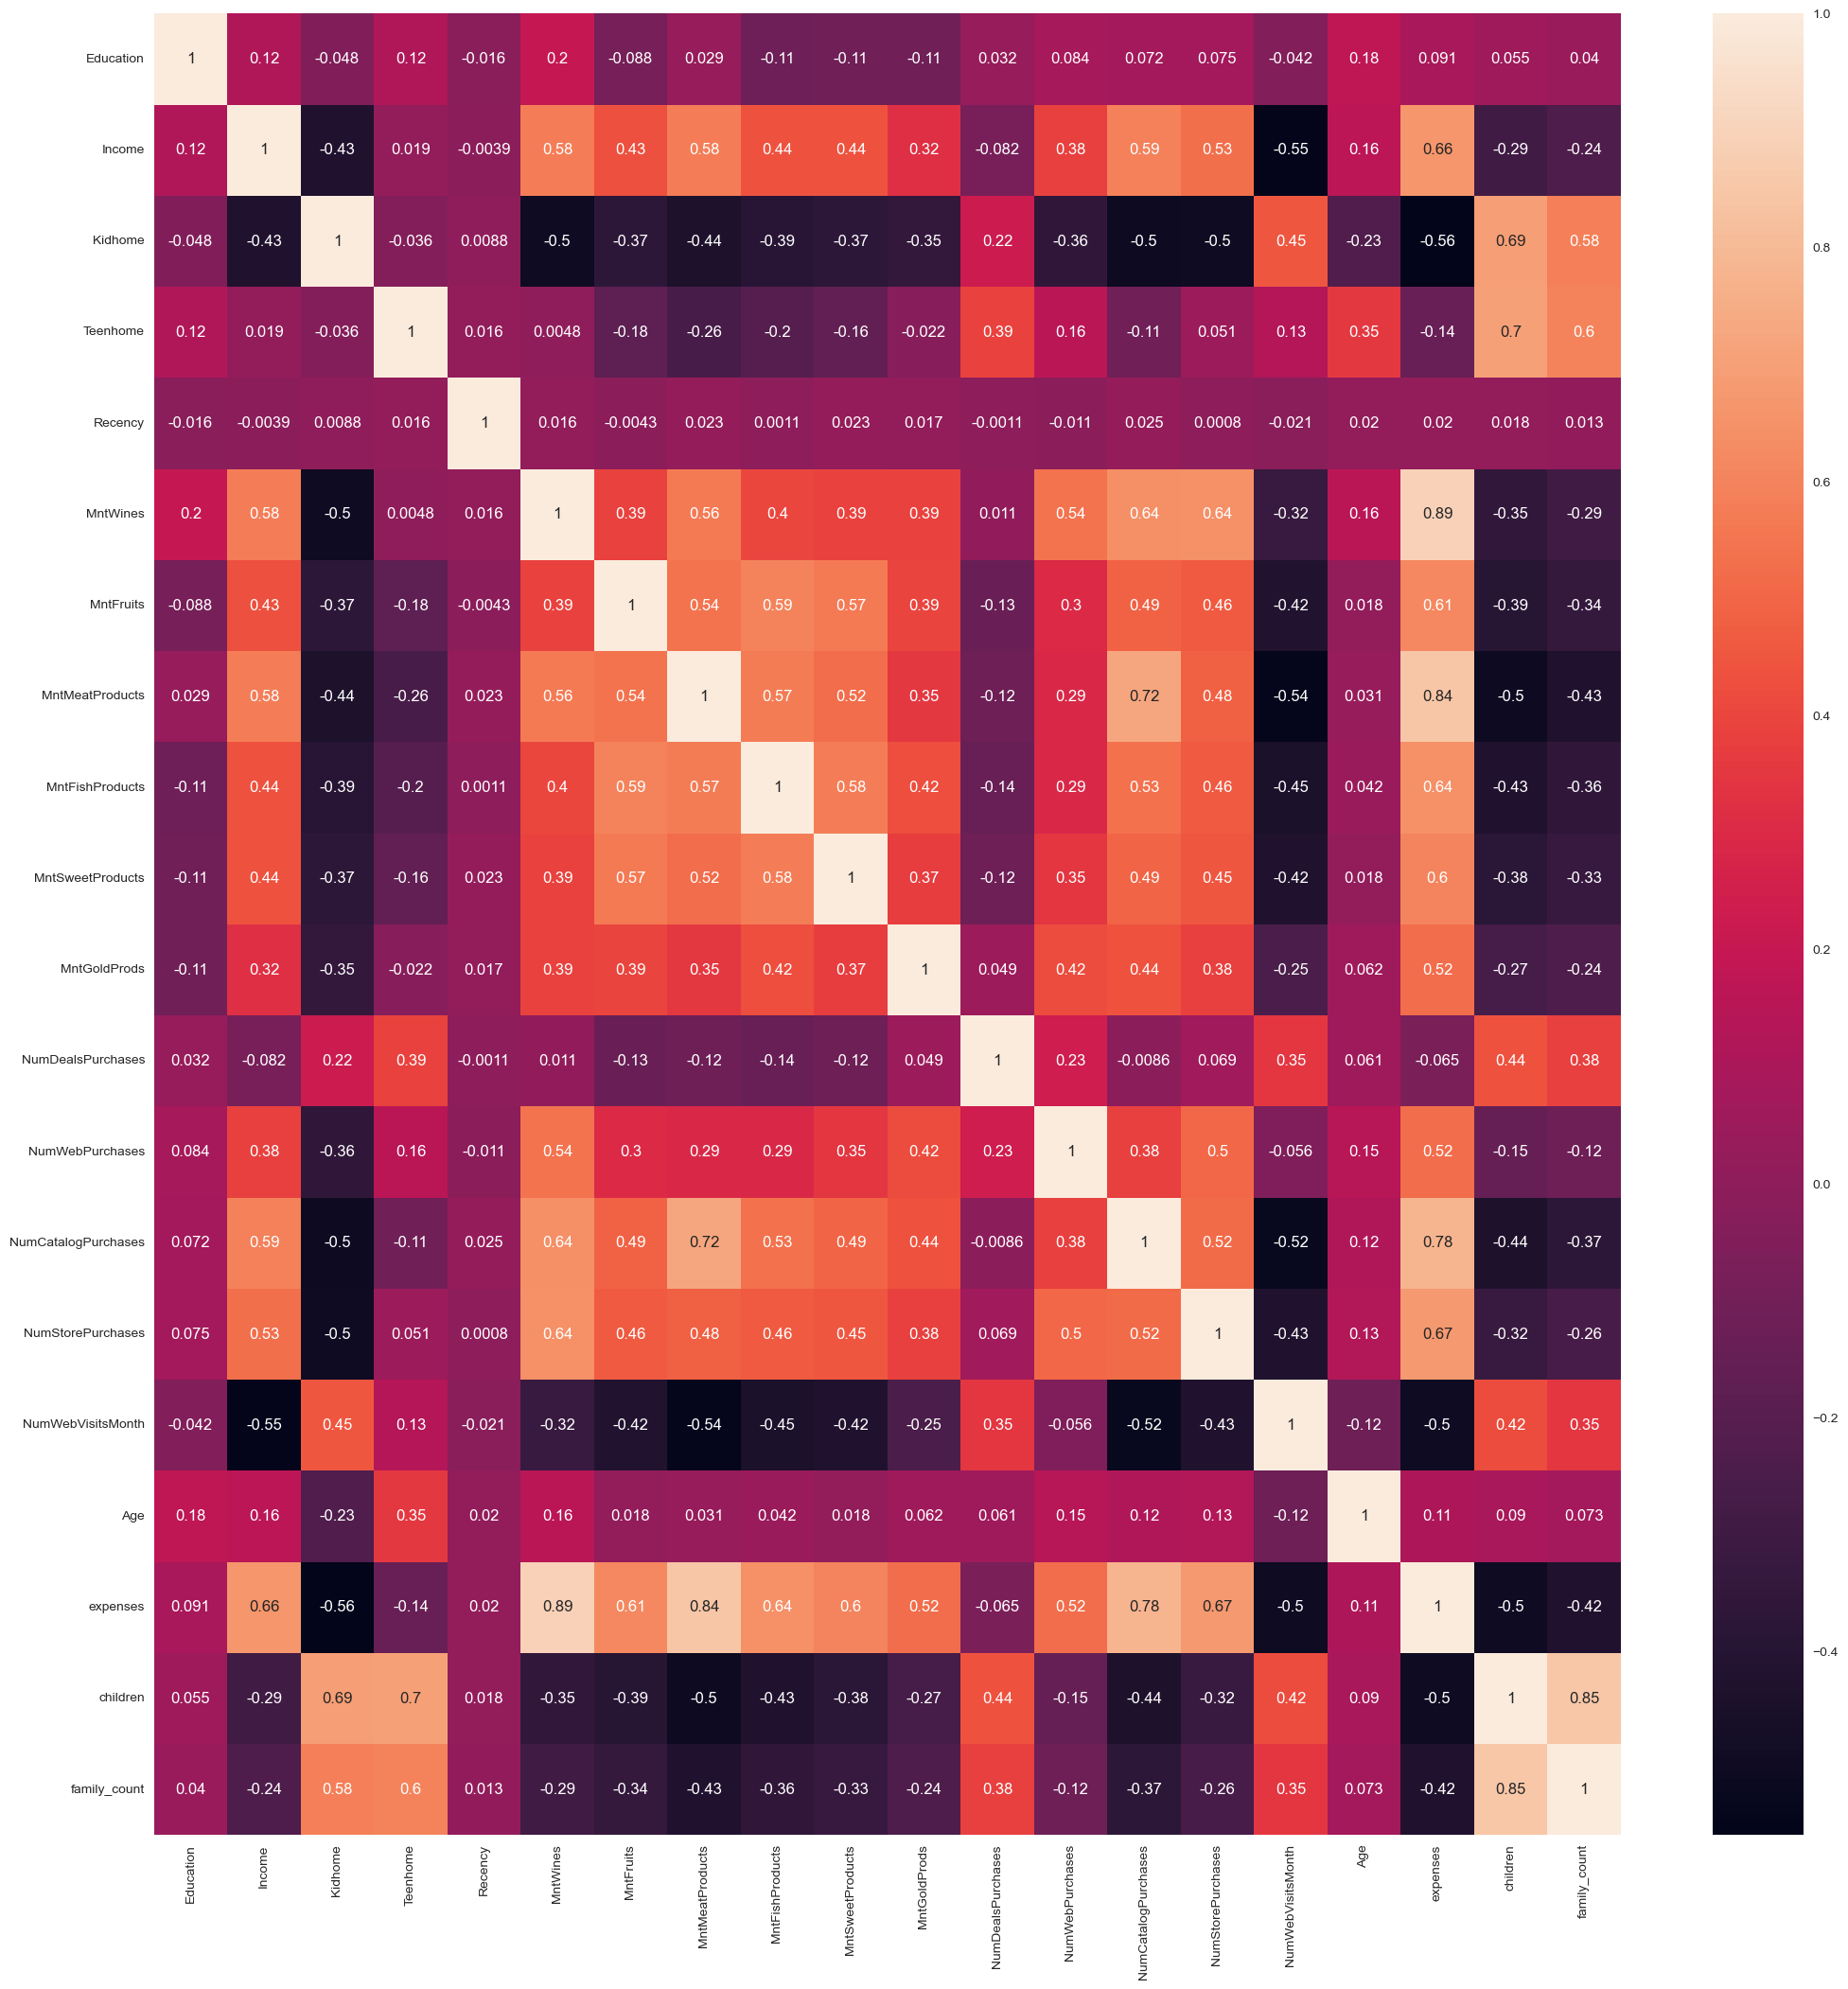

In [27]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(),annot=True)


In [28]:
# considering only necessary columns have been kept and pepocessed..
# moving to data scaling.

In [29]:
sc=StandardScaler()
df_scaled=pd.DataFrame(sc.fit_transform(df),columns=df.columns)
df_scaled

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,expenses,children,family_count
0,-0.506887,0.235327,-0.825218,-0.929894,0.307039,0.983781,1.551577,1.679702,2.462147,1.476500,0.843207,0.349414,1.409304,2.510890,-0.550785,0.693904,0.985345,1.679417,-1.264505,-1.759115
1,-0.506887,-0.235826,1.032559,0.906934,-0.383664,-0.870479,-0.636301,-0.713225,-0.650449,-0.631503,-0.729006,-0.168236,-1.110409,-0.568720,-1.166125,-0.130463,1.235733,-0.961275,1.396361,0.446548
2,-0.506887,0.773633,-0.825218,-0.929894,-0.798086,0.362723,0.570804,-0.177032,1.345274,-0.146905,-0.038766,-0.685887,1.409304,-0.226541,1.295237,-0.542647,0.317643,0.282673,-1.264505,-0.656283
3,-0.506887,-1.022732,1.032559,-0.929894,-0.798086,-0.870479,-0.560857,-0.651187,-0.503974,-0.583043,-0.748179,-0.168236,-0.750450,-0.910898,-0.550785,0.281720,-1.268149,-0.918094,0.065928,0.446548
4,1.586065,0.241519,1.032559,-0.929894,1.550305,-0.389085,0.419916,-0.216914,0.155164,-0.001525,-0.556446,1.384715,0.329427,0.115638,0.064556,-0.130463,-1.017761,-0.305254,0.065928,0.446548
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,-0.506887,0.358568,-0.825218,0.906934,-0.107383,1.203678,0.419916,0.066692,0.081926,2.203398,3.891766,-0.168236,1.769263,0.115638,-0.550785,-0.130463,0.150717,1.221032,0.065928,0.446548
2236,1.586065,0.470064,2.890335,0.906934,0.237969,0.303291,-0.661449,-0.606873,-0.687068,-0.655733,-0.690659,2.420015,1.409304,-0.226541,-0.243114,0.693904,1.903435,-0.268717,2.726794,2.652211
2237,-0.506887,0.189106,-0.825218,-0.929894,1.446700,1.795020,0.545656,0.221789,-0.101168,-0.364974,-0.383886,-0.685887,-0.750450,0.115638,2.218248,0.281720,-1.017761,1.054951,-1.264505,-1.759115
2238,0.539589,0.679035,-0.825218,0.906934,-1.419719,0.368666,0.092992,0.208495,0.777683,0.071165,0.325527,-0.168236,0.689386,0.799996,1.295237,-0.954831,1.068807,0.393948,0.065928,0.446548


## PCA

In [30]:
# checking best optimal value by finding oit eigen values geater than 1

In [31]:
cov_matrix=np.cov(np.transpose(df_scaled),ddof=1)
cov_matrix

array([[ 1.00044663e+00,  1.24019205e-01, -4.77156660e-02,
         1.22525016e-01, -1.60713742e-02,  2.02796786e-01,
        -8.83407908e-02,  2.87853221e-02, -1.14826031e-01,
        -1.07350310e-01, -1.08098175e-01,  3.15432129e-02,
         8.42827846e-02,  7.22356176e-02,  7.47268867e-02,
        -4.20786690e-02,  1.76294460e-01,  9.11599823e-02,
         5.45748576e-02,  4.03740228e-02],
       [ 1.24019205e-01,  1.00044663e+00, -4.25365904e-01,
         1.90265728e-02, -3.94826239e-03,  5.77046823e-01,
         4.28938524e-01,  5.78060216e-01,  4.37691928e-01,
         4.36356398e-01,  3.22121327e-01, -8.23265316e-02,
         3.80720351e-01,  5.86986652e-01,  5.26724429e-01,
        -5.50069657e-01,  1.61013782e-01,  6.65003374e-01,
        -2.90841549e-01, -2.38637964e-01],
       [-4.77156660e-02, -4.25365904e-01,  1.00044663e+00,
        -3.61492870e-02,  8.83067651e-03, -4.96518587e-01,
        -3.72747856e-01, -4.37324717e-01, -3.87817089e-01,
        -3.70838584e-01, -3.4

In [32]:
eig_val,eig_vector=np.linalg.eig(cov_matrix)
print('eig_val==',eig_val,'\n','eig_vectors==',eig_vector)

eig_val== [ 7.61795691e+00  2.61444221e+00  1.39676220e+00  1.14885835e+00
  1.02519896e+00  9.96674661e-01  1.88792341e-01  6.75672152e-01
  6.54827598e-01  6.14227570e-01  2.32531446e-01  2.58861985e-01
  5.39676338e-01  3.29341985e-01  3.85561650e-01  4.09897185e-01
  4.52506086e-01  4.67142921e-01 -6.38656375e-16  3.73281908e-16] 
 eig_vectors== [[-1.13619879e-02 -1.60171680e-01 -5.38023795e-01 -1.58288159e-01
  -4.68252035e-01  3.14834205e-02  1.74473346e-02 -4.30659091e-01
  -2.78371928e-01  2.45786026e-01 -5.46225270e-02 -3.37241111e-02
   3.21305516e-01  2.52123876e-02  3.52255157e-02 -3.90719051e-02
   6.64209907e-02 -2.43643652e-02 -1.24026280e-16 -5.14393159e-17]
 [-2.56204309e-01 -1.44733314e-01 -1.18068049e-01  1.95306936e-01
  -1.72746001e-01 -7.31348328e-02  3.01437132e-02  2.63990156e-01
  -1.87452040e-02  4.46783292e-02 -1.49166675e-01  1.66502830e-02
  -1.70141741e-01  4.94533575e-01  2.86419140e-01  4.23785445e-01
  -1.42172549e-01 -4.18697064e-01 -4.97257135e-16  1.

In [33]:
(eig_val>1).sum()
#optimal number is 5

5

In [34]:
# checking cumulative sum to find out explained vaiation with in 5 optimal deminsions

In [35]:
eig_value=eig_val.tolist()
eig_value.sort(reverse=True)

In [36]:
exv=[]
for i in eig_value:
    exv.append((i/sum(eig_value))*100)
exv

[38.07278016143858,
 13.066375261765486,
 6.9806932413176845,
 5.741727349313463,
 5.123706428786603,
 4.981148583104108,
 3.3768525652948806,
 3.272676321399943,
 3.069766804871273,
 2.69717705383442,
 2.334671876711229,
 2.261520373970112,
 2.048570978373435,
 1.9269476188328705,
 1.6459747874087354,
 1.2937321099278614,
 1.1621381885427267,
 0.943540295106613,
 1.865576321263609e-15,
 -3.191856302627046e-15]

In [37]:
np.cumsum(exv)

array([ 38.07278016,  51.13915542,  58.11984866,  63.86157601,
        68.98528244,  73.96643103,  77.34328359,  80.61595991,
        83.68572672,  86.38290377,  88.71757565,  90.97909602,
        93.027667  ,  94.95461462,  96.60058941,  97.89432152,
        99.0564597 , 100.        , 100.        , 100.        ])

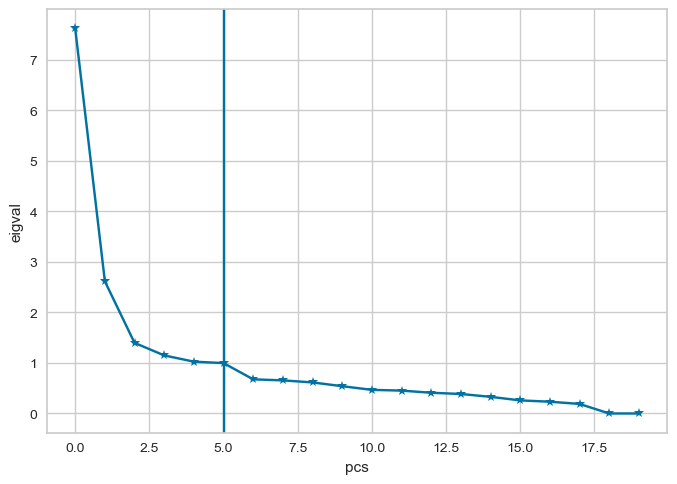

In [38]:
# by using scree plot deciding on 5 optimal number visualy
plt.plot(eig_value,marker='*')
plt.xlabel('pcs')
plt.ylabel('eigval')
plt.axvline(5)
plt.show()

In [39]:
#Initiating PCA to reduce dimentions to 5
pca = PCA(n_components=5)
pca.fit(df_scaled)
PCA_df = pd.DataFrame(pca.transform(df_scaled), columns=(["PC0","PC1", "PC2",'PC3','PC4']))
PCA_df.describe().T

,count,mean,std,min,25%,50%,75%,max
PC0,2240.0,3.806479e-17,2.760065,-5.707158,-2.439028,-0.767934,2.371339,7.244935
PC1,2240.0,8.881784e-17,1.616924,-3.702725,-1.300862,-0.129751,1.163704,6.413716
PC2,2240.0,-3.013462e-17,1.181847,-3.997283,-0.827702,0.030654,0.793193,5.314983
PC3,2240.0,-3.211717e-17,1.071846,-4.473511,-0.745089,0.006666,0.682235,5.318812
PC4,2240.0,3.489272e-17,1.012517,-4.421530,-0.685629,0.041624,0.635240,6.034539


In [40]:
# using Agglomerative clustering

In [41]:
euci_dist = euclidean_distances(df_scaled)
euci_dist

array([[0.        , 8.61507732, 5.29925271, ..., 6.34643773, 5.96089038,
        8.70973666],
       [8.61507732, 0.        , 6.29480305, ..., 7.33501264, 5.33892924,
        2.78631744],
       [5.29925271, 6.29480305, 0.        , ..., 4.44520741, 3.36402406,
        6.48043053],
       ...,
       [6.34643773, 7.33501264, 4.44520741, ..., 0.        , 5.7660219 ,
        7.63078178],
       [5.96089038, 5.33892924, 3.36402406, ..., 5.7660219 , 0.        ,
        4.99725077],
       [8.70973666, 2.78631744, 6.48043053, ..., 7.63078178, 4.99725077,
        0.        ]])

In [42]:
z=linkage(df_scaled)
z

array([[2.90000000e+01, 1.20600000e+03, 0.00000000e+00, 2.00000000e+00],
       [1.43800000e+03, 2.18200000e+03, 0.00000000e+00, 2.00000000e+00],
       [1.84000000e+02, 1.76800000e+03, 0.00000000e+00, 2.00000000e+00],
       ...,
       [4.47400000e+03, 4.47500000e+03, 8.72524281e+00, 2.23800000e+03],
       [1.89800000e+03, 4.47600000e+03, 8.74182389e+00, 2.23900000e+03],
       [2.23300000e+03, 4.47700000e+03, 2.06062649e+01, 2.24000000e+03]])

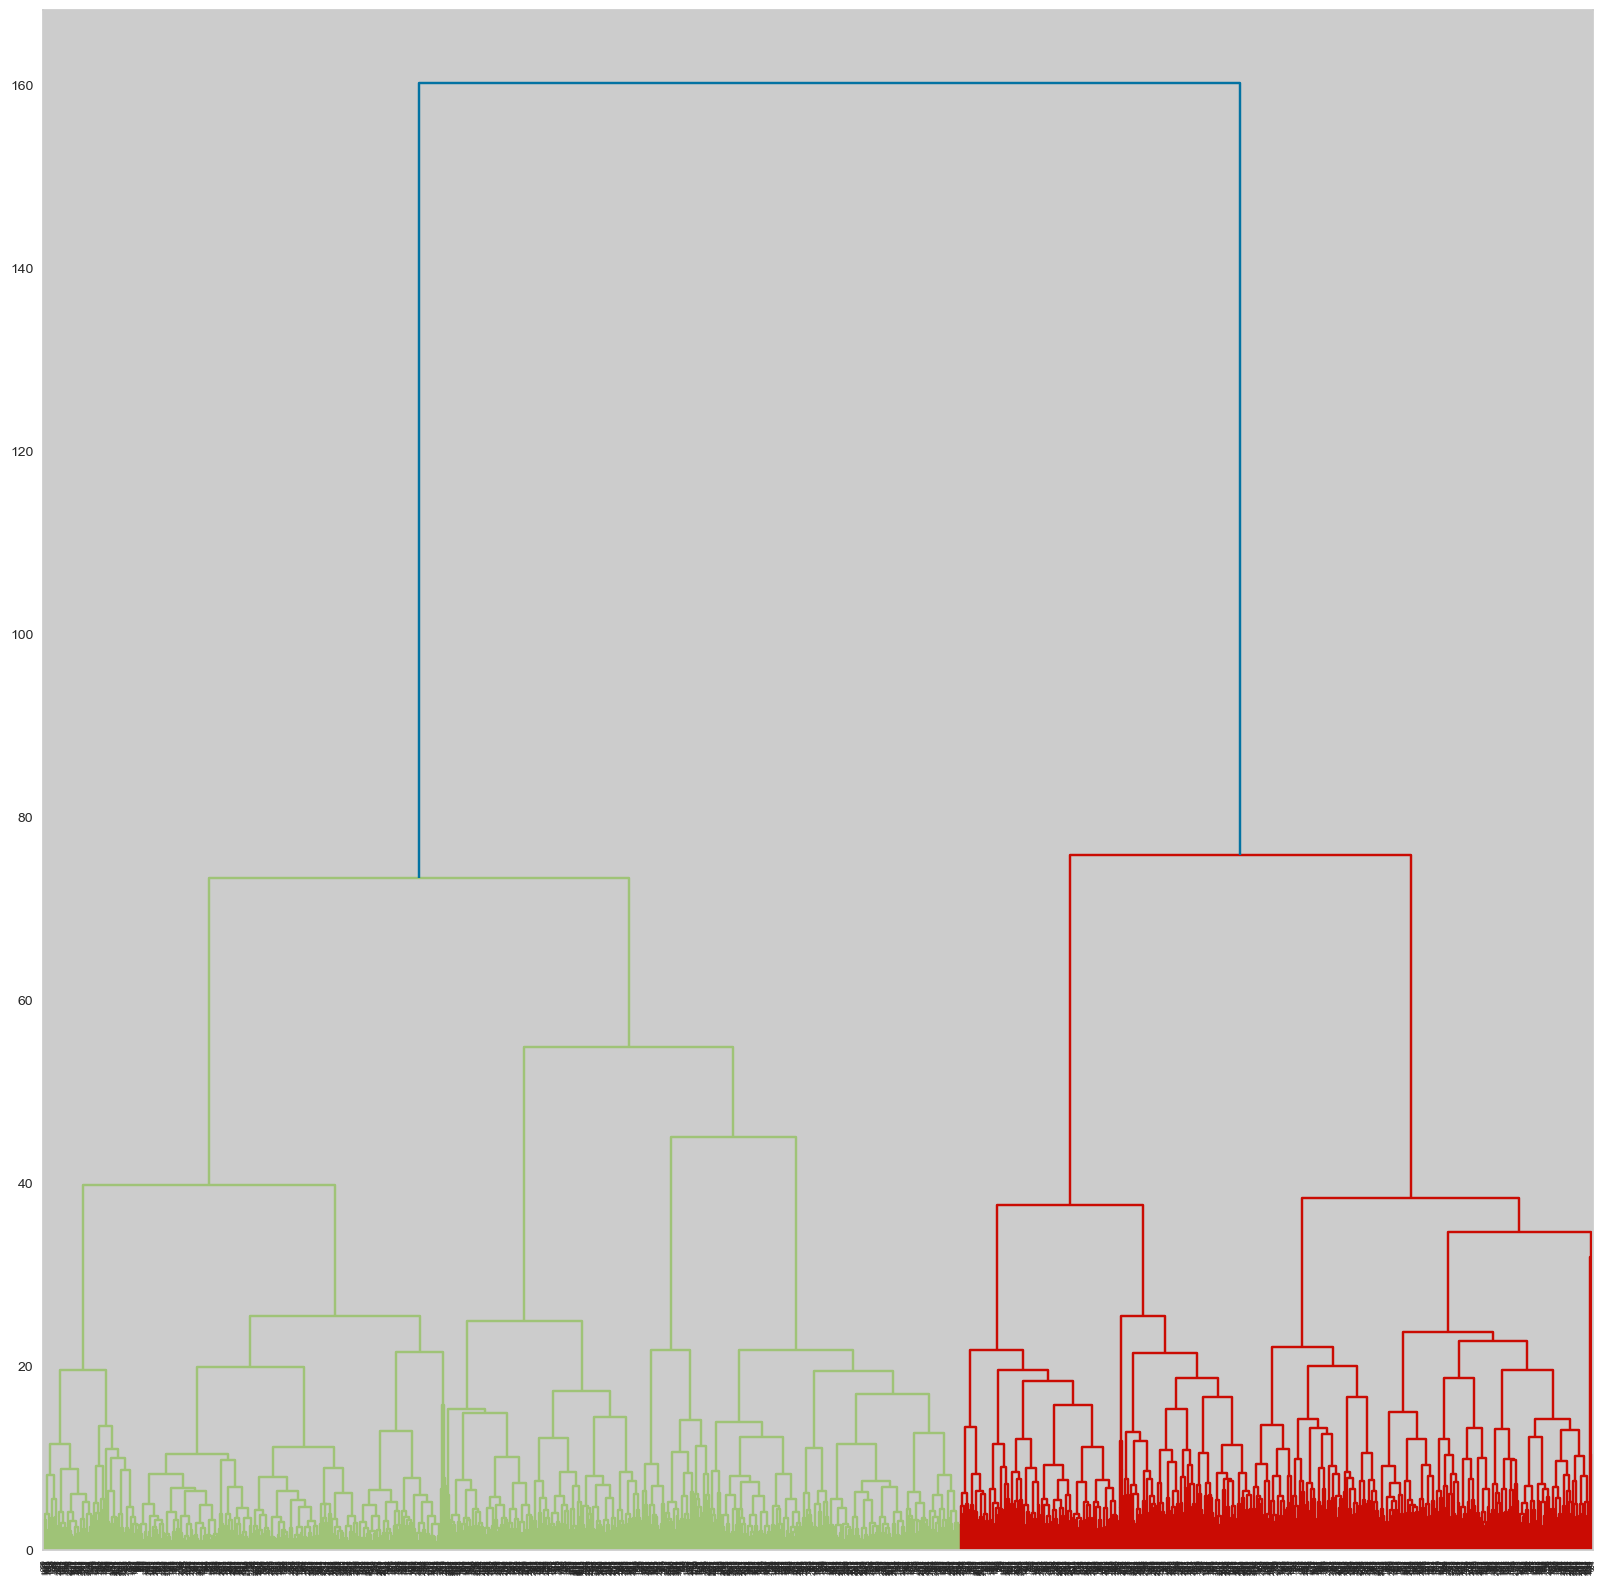

In [43]:
plt.figure(figsize=(20,20))
z=linkage(df_scaled,method='ward')
dendrogram(z)
plt.show()

In [44]:
e=euci_dist[np.triu_indices(2240,k=1)]

In [45]:
cophenet(z,e)

(0.577195367483735,
 array([160.24185441,  75.9619828 , 160.24185441, ...,  75.9619828 ,
        160.24185441, 160.24185441]))

In [46]:
#Initiating the Agglomerative Clustering model 
# The best clusters from dendrogram is 2
AC = AgglomerativeClustering(n_clusters=2)

AC.fit_predict(PCA_df)
PCA_df["labels"] = AC.labels_



In [47]:
df['labels']=AC.labels_

<Axes: xlabel='labels', ylabel='count'>

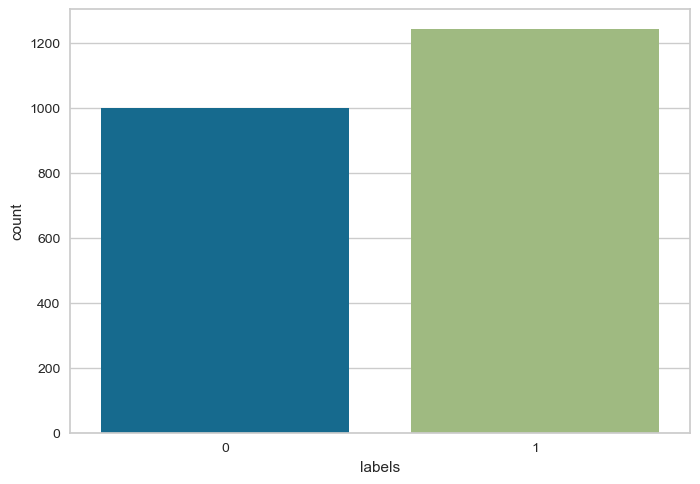

In [48]:
sns.countplot(x=df["labels"])

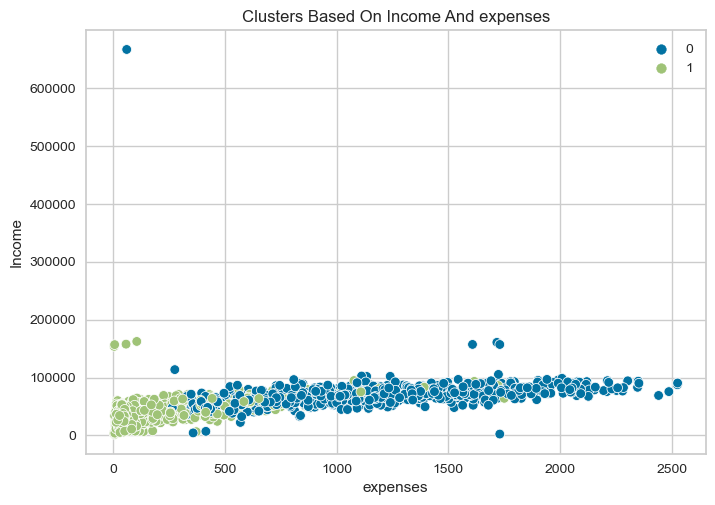

In [49]:
sns.scatterplot(data = df,x=df["expenses"], y=df["Income"],hue=df["labels"])
plt.title("Clusters Based On Income And expenses")
plt.legend()
plt.show()

In [50]:
df[df['labels']==0].describe().T

,count,mean,std,min,25%,50%,75%,max
Education,999.0,1.582583,0.954337,0.0,1.0,1.0,3.0,3.0
Income,999.0,69451.474485,23549.229810,2447.0,60215.0,69283.0,78342.0,666666.0
Kidhome,999.0,0.035035,0.183960,0.0,0.0,0.0,0.0,1.0
Teenhome,999.0,0.471471,0.505418,0.0,0.0,0.0,1.0,2.0
Recency,999.0,49.044044,29.142145,0.0,24.0,50.0,73.0,99.0
MntWines,999.0,570.551552,312.655770,1.0,324.0,520.0,775.5,1493.0
MntFruits,999.0,49.783784,48.304948,0.0,12.0,33.0,75.5,199.0
MntMeatProducts,999.0,325.576577,254.485275,3.0,125.0,255.0,457.5,1725.0
MntFishProducts,999.0,71.103103,64.730971,0.0,19.0,52.0,106.0,259.0
MntSweetProducts,999.0,51.308308,50.223299,0.0,12.0,35.0,78.5,263.0


In [51]:
df[df['labels']==1].describe().T

,count,mean,std,min,25%,50%,75%,max
Education,1241.0,1.405318,0.950011,0.0,1.0,1.0,2.0,3.0
Income,1241.0,38397.921049,15974.639413,1730.0,27683.0,37244.0,47570.0,162397.0
Kidhome,1241.0,0.773570,0.502713,0.0,0.0,1.0,1.0,2.0
Teenhome,1241.0,0.534247,0.572765,0.0,0.0,0.0,1.0,2.0
Recency,1241.0,49.161966,28.828643,0.0,25.0,49.0,75.0,99.0
MntWines,1241.0,89.311039,150.101111,0.0,10.0,29.0,102.0,1459.0
MntFruits,1241.0,7.399678,13.289025,0.0,1.0,3.0,8.0,137.0
MntMeatProducts,1241.0,39.256245,57.259092,0.0,9.0,18.0,47.0,650.0
MntFishProducts,1241.0,10.495568,19.409887,0.0,2.0,4.0,12.0,223.0
MntSweetProducts,1241.0,7.545528,13.857445,0.0,1.0,3.0,9.0,150.0


In [52]:
#lable 0 has more income and more expense compared to label 1

In [53]:
df.columns

Index(['Education', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Age',
       'expenses', 'children', 'family_count', 'labels'],
      dtype='object')

<Figure size 800x550 with 0 Axes>

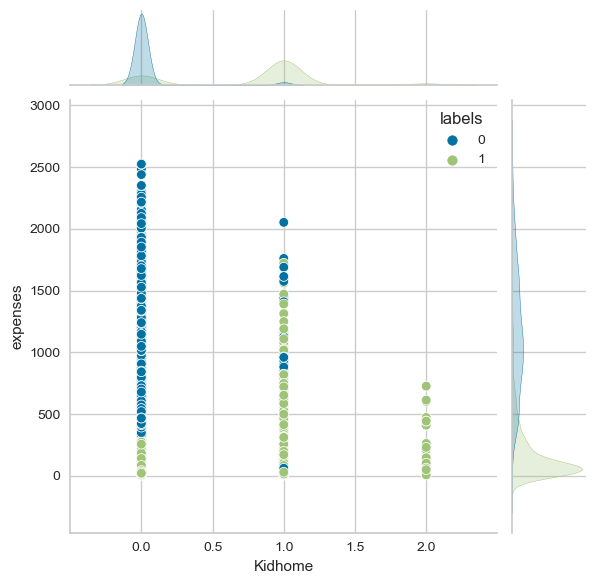

<Figure size 800x550 with 0 Axes>

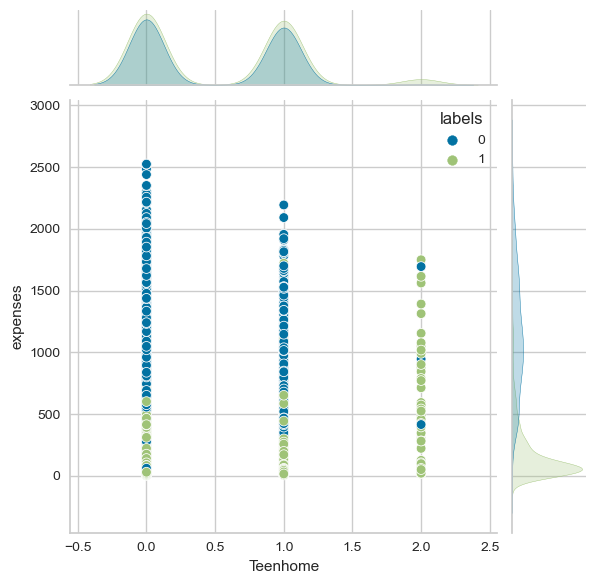

<Figure size 800x550 with 0 Axes>

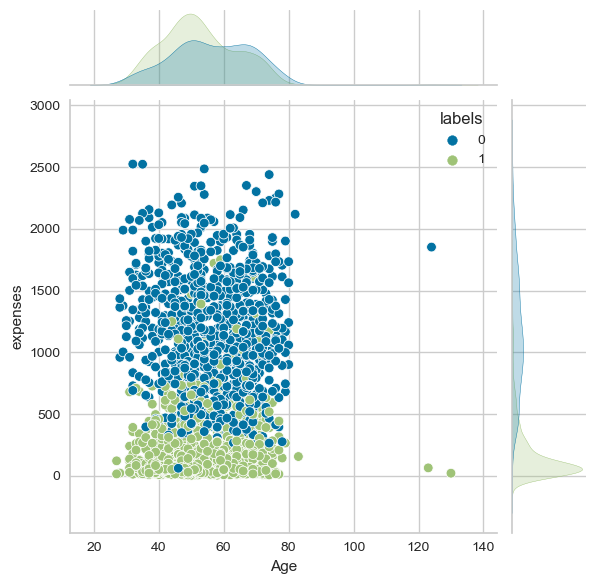

<Figure size 800x550 with 0 Axes>

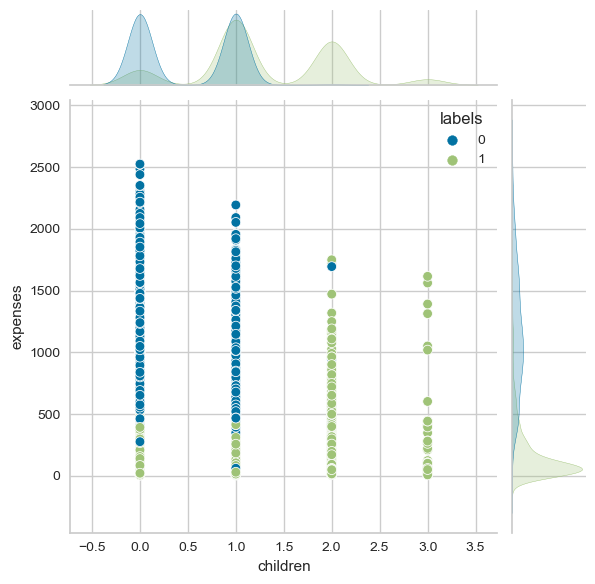

<Figure size 800x550 with 0 Axes>

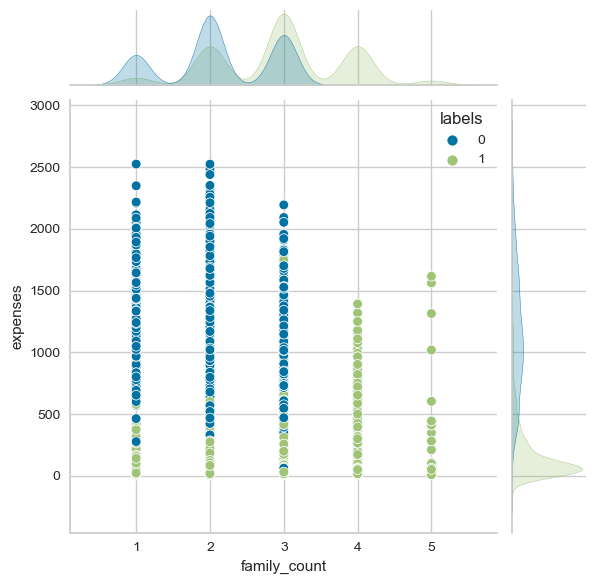

<Figure size 800x550 with 0 Axes>

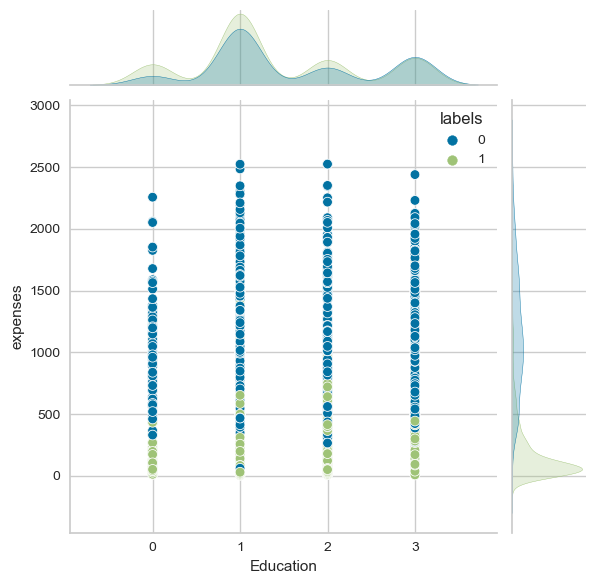

In [54]:
df_new= [ "Kidhome","Teenhome", "Age", "children", "family_count", "Education"]

for i in df_new:
    plt.figure()
    sns.jointplot(x=df[i], y=df["expenses"], hue =df["labels"])
    plt.show()

In [55]:
# visualising customers expenses with various characteristics added .